# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('../Resources/P3_Data.csv')
data.head(312)

,Quarter,Year,Company_Name,Ticker,SharePrice_USD,Expenses_B_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,1,2005,Exxon,XOM,56,61.76,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,1,2005,BP,BP,62,47.08,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,1,2005,Equinor,EQNR,17,9.96,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,1,2005,Chevron,CVX,57,34.46,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,1,2005,Shell,RDS-A,63,62.36,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,4,2017,BP,BP,40,67.56,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,4,2017,Equinor,EQNR,20,11.93,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,4,2017,Chevron,CVX,118,35.96,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,4,2017,Shell,RDS-A,65,80.59,85.42,1.41,0.0094,0.042,61,3.84,0.0120


In [3]:
import statsmodels.api as OLS

X = data[["Expenses_B_USD", "Revenue_B_USD", "CashFlow_B_USD", "DividendYield_Percent", "US_Unemployment_Percent", "Brent_USD", "LNG_USD", "US_Interest_Percent"]]
y = data["SharePrice_USD"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (312, 8) (312, 1)


In [4]:
corrMatrix = data.corr()
print (corrMatrix)

                          Quarter      Year  SharePrice_USD  Expenses_B_USD  \
Quarter                  1.000000  0.000000        0.013072        0.047205   
Year                     0.000000  1.000000        0.015998       -0.035499   
SharePrice_USD           0.013072  0.015998        1.000000        0.416086   
Expenses_B_USD           0.047205 -0.035499        0.416086        1.000000   
Revenue_B_USD            0.023989 -0.136834        0.430103        0.977803   
CashFlow_B_USD          -0.168770 -0.291652        0.215475        0.320783   
DividendYield_Percent    0.068201  0.233060        0.448952        0.204314   
US_Unemployment_Percent -0.000448 -0.049683       -0.050495        0.189796   
Brent_USD                0.010003 -0.046826        0.189371        0.419763   
LNG_USD                 -0.017661 -0.728134        0.042145        0.032975   
US_Interest_Percent     -0.004149 -0.691042        0.043375       -0.083592   

                         Revenue_B_USD  CashFlow_B_

In [5]:
!pip install seaborn

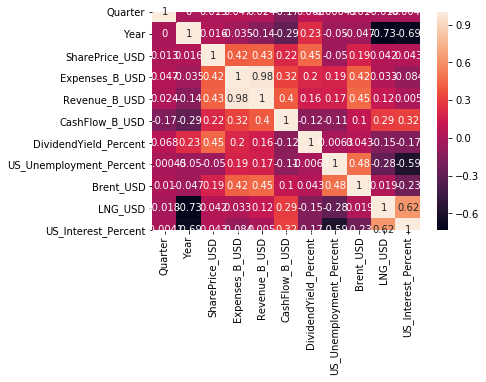

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     21.80
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           3.70e-26
Time:                        11:32:45   Log-Likelihood:                -1378.8
No. Observations:                 312   AIC:                             2776.
Df Residuals:                     303   BIC:                             2809.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      31.5999      6.784      4.658      0.000      18.249      44.950
Expenses_B_USD             -0.2819      0.244     -1.156      0.249      -0.762       0.198
Revenue_B_USD               0.5091      0.233      2.188      0.029       0.051       0.967
CashFlow_B_USD              0.7279      0.425      1.712      0.088      -0.109       1.565
DividendYield_Percent    2829.6950    328.449      8.615      0.000    2183.366    3476.024
US_Unemployment_Percent  -148.7154     84.355     -1.763      0.079    -314.711      17.280
Brent_USD                   0.0713      0.058      1.226      0.221      -0.043       0.186
LNG_USD                    -0.2877      0.454     -0.633      0.527      -1.182       0.606
US_Interest_Percent        43.0122    103.960      0.414      0.679    -161.562     247.586
==============================================================================
Omnibus:                       20.284   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.031
Skew:                           0.665   Prob(JB):                     9.98e-06
Kurtosis:                       2.954   Cond. No.                     3.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.36534355799198315


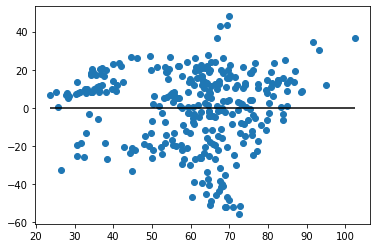

In [9]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [62]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [64]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

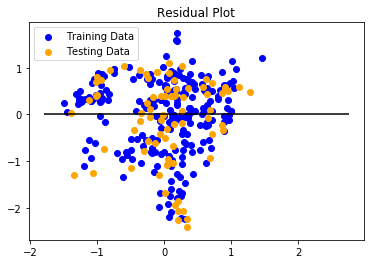

In [66]:
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [67]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8337562060118072, R2: 0.289427980526862


In [68]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8292164272853961, R2: 0.29329702487619


In [69]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8336939940264736, R2: 0.2894810009370673


In [70]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8282100857964031, R2: 0.2941546833847052


In [ ]:
# Run auto ML - review Saturday class

In [ ]:
# Track results - take features, gather data on 2018 - graph model, predictions vs. actual

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

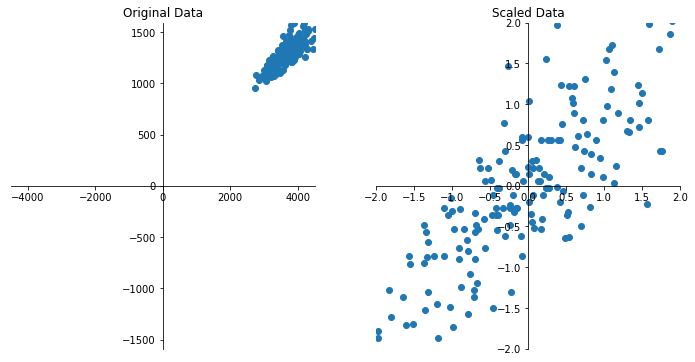

In [10]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [11]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


Step 2) Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

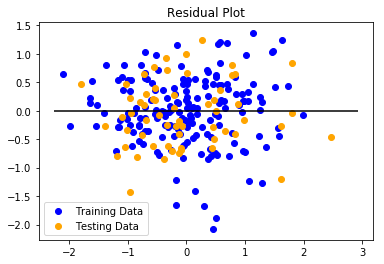

In [14]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [15]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991294, R2: 0.6804912531419804


Your Turn!